<a href="https://colab.research.google.com/github/rvnalage/mtech_lp2_submission/blob/main/SemanticSimilarityUsingPreTrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install torch transformers datasets scikit-learn sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Import required libraries
import torch
from sentence_transformers import SentenceTransformer, util
from datasets import load_dataset
from sklearn.metrics import mean_squared_error

# Load the pre-trained model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Verify GPU availability
print("GPU available:", torch.cuda.is_available())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

GPU available: False


In [ ]:
# Load the STS Benchmark dataset (English configuration)
sts_dataset = load_dataset("stsb_multi_mt", "en", split="test")

# Display the first 5 entries
for i, entry in enumerate(sts_dataset.select(range(5))):
    print(f"Pair {i+1}:")
    print(f"  Sentence 1: {entry['sentence1']}")
    print(f"  Sentence 2: {entry['sentence2']}")
    print(f"  True Similarity Score: {entry['similarity_score']}")
    print("-" * 50)


train-00000-of-00001.parquet:   0%|          | 0.00/470k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/108k [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Pair 1:
  Sentence 1: A girl is styling her hair.
  Sentence 2: A girl is brushing her hair.
  True Similarity Score: 2.5
--------------------------------------------------
Pair 2:
  Sentence 1: A group of men play soccer on the beach.
  Sentence 2: A group of boys are playing soccer on the beach.
  True Similarity Score: 3.5999999046325684
--------------------------------------------------
Pair 3:
  Sentence 1: One woman is measuring another woman's ankle.
  Sentence 2: A woman measures another woman's ankle.
  True Similarity Score: 5.0
--------------------------------------------------
Pair 4:
  Sentence 1: A man is cutting up a cucumber.
  Sentence 2: A man is slicing a cucumber.
  True Similarity Score: 4.199999809265137
--------------------------------------------------
Pair 5:
  Sentence 1: A man is playing a harp.
  Sentence 2: A man is playing a keyboard.
  True Similarity Score: 1.5
--------------------------------------------------


In [ ]:
# Initialize lists to store true and predicted scores
true_scores = []
predicted_scores = []

# Loop through the dataset and compute similarities
for data in sts_dataset:
    sentence1, sentence2 = data['sentence1'], data['sentence2']
    true_score = data['similarity_score']

    # Compute embeddings and similarity score
    embeddings1 = model.encode(sentence1, convert_to_tensor=True)
    embeddings2 = model.encode(sentence2, convert_to_tensor=True)
    similarity = util.cos_sim(embeddings1, embeddings2).item()

    true_scores.append(true_score)
    predicted_scores.append(similarity)

print("Semantic similarity computed for all pairs.")


Semantic similarity computed for all pairs.


In [ ]:
# Normalize true scores (0-5 scale to 0-1 scale)
true_scores = torch.tensor(true_scores) / 5.0
predicted_scores = torch.tensor(predicted_scores)

# Compute Mean Squared Error
mse = mean_squared_error(true_scores, predicted_scores)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.03681892777690585


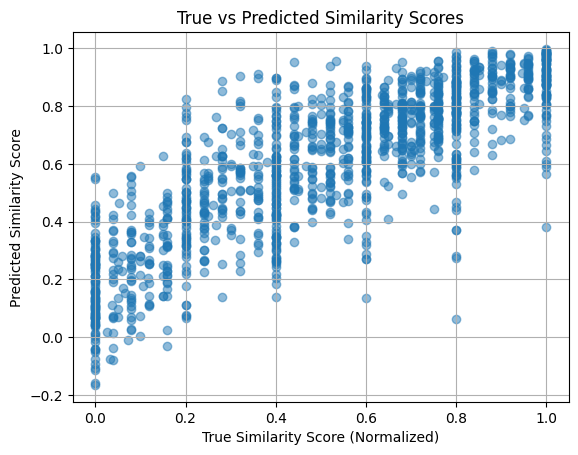

In [ ]:
# Optional: Visualize the relationship between true and predicted scores
import matplotlib.pyplot as plt

plt.scatter(true_scores, predicted_scores, alpha=0.5)
plt.xlabel("True Similarity Score (Normalized)")
plt.ylabel("Predicted Similarity Score")
plt.title("True vs Predicted Similarity Scores")
plt.grid(True)
plt.show()
